In [16]:
import gropt
import numpy as np
import matplotlib.pyplot as plt

In [17]:
params = {'dt': 400e-6, 
          'T_90': 4e-3, 
          'T_180': 6e-3, 
          'T_readout': 12e-3, 
          'TE': 100.0e-3,
          'N_moments': 1, 
          'moment_tol': 1e-4,
          'gmax': 0.04, 
          'smax': 50,
           'l2_reg': 1e-6}

ind_inv = int(params['TE']/2.0/params['dt'])

params0 = np.zeros(100)

params0[0] = params['dt']
params0[1] = params['T_90']
params0[2] = params['T_180']
params0[3] = params['T_readout']
params0[4] = params['TE']
params0[5] = params['N_moments']
params0[6] = params['moment_tol']
params0[7] = params['gmax']
params0[8] = params['smax']
params0[9] = params['l2_reg']

iso_bval = 300
params0[10] = iso_bval
params0[11] = iso_bval
params0[12] = iso_bval

params0[13] = 3


G = gropt.threed_diff(params0)

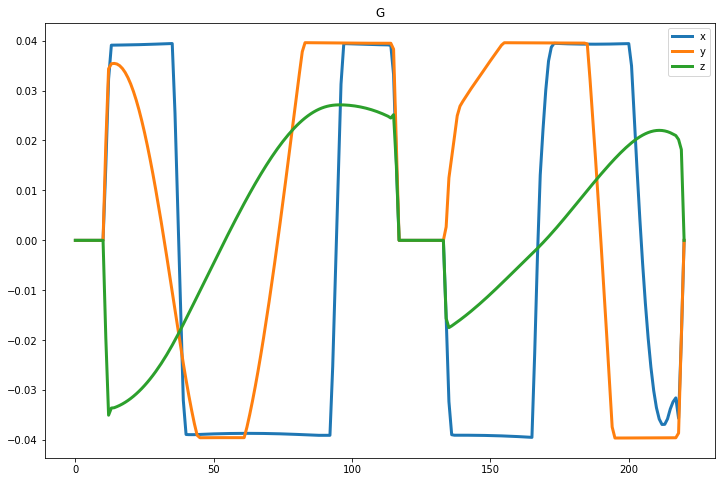

In [18]:
G3 = np.reshape(G, [3, -1])
plt.figure(figsize=(12,8))
f = plt.plot(G3.T, linewidth=3)
plt.title('G')
plt.legend(labels=['x', 'y', 'z'])

In [19]:
np.set_printoptions(suppress=True, precision=2)

G3 = np.reshape(G, [3, -1])
G3i = G3.copy()
G3i[:, ind_inv:] *= -1
G3ic = np.cumsum(G3i, 1)

dt = params0[0]
GAMMA = 2*np.pi*42.58e3*dt
SCALE = GAMMA * GAMMA * dt

q = np.sqrt(SCALE) * np.cumsum(G3i, 1)
btensor = q@(q.T)
# btensor[btensor < 1] = 0.0

print('btensor\n', btensor, '\n')

btensor
 [[300.08   0.01  -0.03]
 [  0.01 299.98   0.06]
 [ -0.03   0.06 299.94]] 



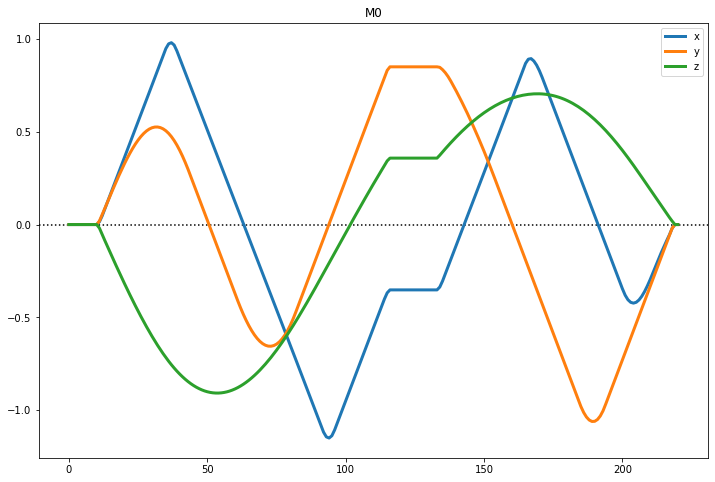

In [20]:
M0 = G3ic
plt.figure(figsize=(12,8))
f = plt.plot(M0.T, linewidth=3)
plt.title('M0')
plt.legend(labels=['x', 'y', 'z'])
plt.axhline(0, color='k', zorder = -10, linestyle=':')

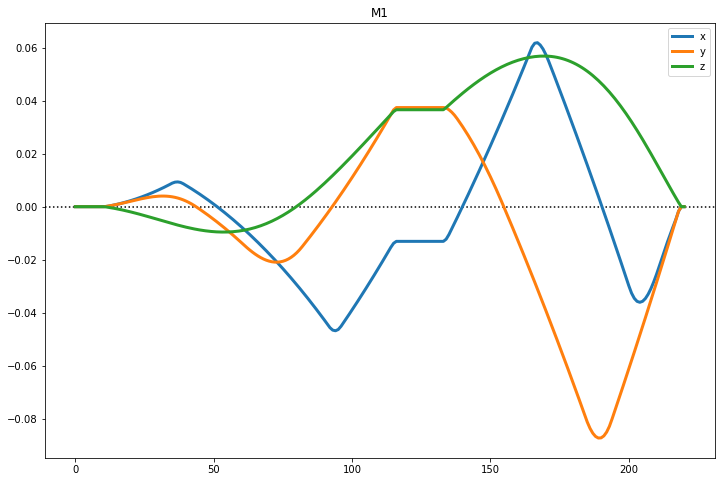

In [21]:
dta = np.arange(G3i.shape[1]) * params['dt']
M1 = np.cumsum(G3i*dta[None,:], 1)
plt.figure(figsize=(12,8))
f = plt.plot(M1.T, linewidth=3)
plt.title('M1')
plt.legend(labels=['x', 'y', 'z'])
plt.axhline(0, color='k', zorder = -10, linestyle=':')

In [13]:
G3 = np.reshape(G, [3, -1])
G3i = G3.copy()
G3i[:, 126:] *= -1
G3ic = np.cumsum(G3i, 1)

In [69]:
dta = np.arange(G3i.shape[1]) * params['dt']
dta

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.

In [26]:
q[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.07403135,
       -0.15667446, -0.23864983, -0.31966193, -0.3993798 , -0.47747587,
       -0.55362309, -0.62749585, -0.69877477, -0.76714858, -0.83231541,
       -0.89398419, -0.95187678, -1.0057294 , -1.0552946 , -1.10034355,
       -1.14066809, -1.17608307, -1.20642787, -1.23156909, -1.25140135,
       -1.26584938, -1.27486924, -1.27844912, -1.27661066, -1.26940907,
       -1.25693311, -1.2393058 , -1.21668299, -1.18925368, -1.15723872,
       -1.12088949, -1.08048665, -1.03633898, -0.98878185, -0.93817596,
       -0.88490499, -0.82937412, -0.77200818, -0.71324903, -0.65354822,
       -0.59336434, -0.53316059, -0.47340426, -0.41456384, -0.35710741,
       -0.30149992, -0.24820052, -0.19765984, -0.15031777, -0.10660057,
       -0.06691697, -0.03165556, -0.0011813 ,  0.02416694,  0.04408003,
        0.05828176,  0.06653721,  0.06865721,  0.06450091,  0.05

In [14]:
np.linalg.pinv(btensor)

array([[ 0.00707424,  0.00296715, -0.00054131],
       [ 0.00296715,  0.00240203, -0.00146258],
       [-0.00054131, -0.00146258,  0.00308568]])

In [9]:
b0 = np.array([[200, 10, 0], [0, 200, 0], [0, 0, 200]])
b0

array([[200,  10,   0],
       [  0, 200,   0],
       [  0,   0, 200]])

In [10]:
mod = b0 @ np.linalg.pinv(btensor)
mod

array([[ 1.00966207,  0.03215139,  0.00043821],
       [-0.01786935,  1.00041479, -0.00022241],
       [ 0.00044933, -0.00022241,  0.98915769]])

In [11]:
u, s, vh = np.linalg.svd(mod)
print(s)
sp = np.sqrt(s)
print(sp)
mod2 = u@np.diag(sp)@vh
print(mod2)

[1.01386002 0.99686391 0.9891329 ]
[1.00690616 0.99843072 0.99455161]
[[ 1.00465759  0.02850456  0.00021797]
 [-0.02138247  1.00004624 -0.00010909]
 [ 0.00022636 -0.00011464  0.99456404]]
